In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data_orj = pd.read_csv("BlackFriday.csv")
data = data_orj.loc [1:20000,'Gender':'Purchase']

In [3]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,M,26-35,15,A,3,0,1,2.0,NaN,15227


M    15271
F     4729
Name: Gender, dtype: int64

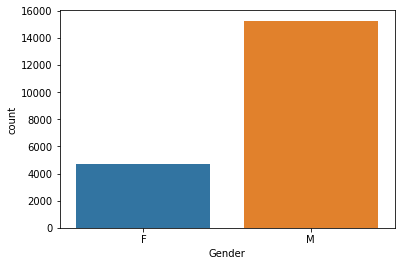

In [4]:
sns.countplot(x='Gender', data=data)
data.loc[:,'Gender'].value_counts()

In [5]:
data_knn = data[['Occupation','Gender', 'Purchase']]

In [6]:
inK = int(input("Masukkan K : "))

Masukkan K : 3


In [14]:
knn = KNeighborsClassifier(n_neighbors = inK)
x,y = data_knn.loc[:,data_knn.columns != 'Gender'], data_knn.loc[:,'Gender']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print (len(x_train))
print (len(x_test))

14000
6000


In [8]:
print('KNN dengan (K=,',inK,') Akurasinya adalah: ', knn.score(x_test,y_test))

KNN dengan (K=, 3 ) Akurasinya adalah:  0.6991666666666667


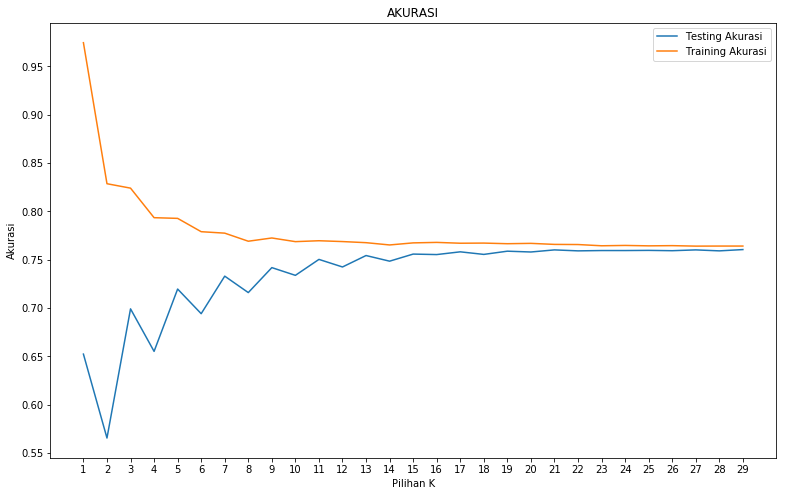

Akurasi terbaik 0.7605 dengan K = 29


In [9]:
#Best K value selection
neig = np.arange(1,30)
train_accuracy = []
test_accuracy = []
for i, k in enumerate (neig):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

# Plot
plt.figure(figsize=(13,8))
plt.plot(neig, test_accuracy, label = 'Testing Akurasi')
plt.plot(neig, train_accuracy, label = 'Training Akurasi')
plt.legend()
plt.title('AKURASI')
plt.xlabel('Pilihan K')
plt.ylabel('Akurasi')
plt.xticks(neig)
plt.show()
print('Akurasi terbaik {} dengan K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [10]:
datatest = pd.DataFrame(x_test)
datatest["Gender"] = y_test
datatest["prediction"] = prediction
print ("Data Asli dan Prediksinya")
print (datatest)

Data Asli dan Prediksinya
       Occupation  Purchase Gender prediction
10651           0     20088      M          M
2042           11      5323      M          F
8669           10      9567      M          M
1115            1      6907      F          M
13903          16     11533      M          M
11964          11      7825      M          M
11073          20      7762      M          M
3003           14      1828      M          F
19772          10     11613      M          M
8116           17      6061      M          M
3526           17     19538      F          M
7880           13      9984      M          M
16442          11     16550      M          M
16297           7      9934      M          F
12567           1      5323      M          M
5253            2      2980      F          F
19394           3      4043      F          M
16797           3      1534      M          M
8095           17       397      M          M
323             0     10766      M          M
9924    